In [1]:
%cd /nfsd/sysbiobig/bazzaccoen/tangramlit_dev

/nfsd/sysbiobig/bazzaccoen/tangramlit_dev


In [2]:
import tangramlit as tgl

/nfsd/sysbiobig/bazzaccoen/tangramlit_dev/myvenv/lib64/python3.12/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/nfsd/sysbiobig/bazzaccoen/tangramlit_dev/myvenv/lib64/python3.12/site-packages/xarray_schema/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution
/nfsd/sysbiobig/bazzaccoen/tangramlit_dev/myvenv/lib64/python3.12/site-packages/anndata/utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text 

In [3]:
import scanpy as sc
import numpy as np 
import anndata as ad
# import pandas as pd
import yaml

In [4]:
# Set data path
data_path = "/nfsd/sysbiobig/bazzaccoen/tangramlit_dev/data/Dataset6/"

# Data preparation

## SC data

In [ ]:
# Read csvs
genes = pd.read_csv(f"{data_path}GSE113576/genes.tsv.gz", sep='\t', header=None, names=["gene_id", "gene_name"])
cells = pd.read_csv(f"{data_path}GSE113576/barcodes.tsv.gz", sep='\t', header=None, names=["barcode"])

In [ ]:
from scipy.io import mmread

# Read counts
X = mmread(f"{data_path}GSE113576/matrix.mtx.gz").T.tocsr()  # sparse matrix

In [19]:
# Create adata
adata_sc = ad.AnnData(X=X)
adata_sc.var["gene_ids"] = genes["gene_id"].values
adata_sc.var_names = genes["gene_name"].values
adata_sc.obs_names = cells["barcode"].values
adata_sc

AnnData object with n_obs × n_vars = 31299 × 27998
    var: 'gene_ids'

The number of cell matches the bechmarking, while the number of genes in the paper is restricetd to $18646$ wrt to the original $27998$.

Any type of annotation is missing, including cell type and counts are raw.

In [20]:
# Save h5ad
sc.write(data_path + "/scRNA_data.h5ad", adata_sc, "h5ad")

/tmp/ipykernel_170759/2432265069.py:2: FutureWarning: The specified parameters ('ext',) are no longer positional. Please specify them like `ext='h5ad'`
  sc.write(data_path + "/scRNA_data.h5ad", adata_sc, "h5ad")


## MERFISH data
The csv file contains, in a single dataframe, cell metadata and counts per gene all organized as columns, thus I need to split the columns reading:

In [ ]:
# Read csv
merfish_df = pd.read_csv(data_path + "merfish_all_cells_counts_meta.csv", header=0, index_col=0)  # Cell_ID column as index
metadata_cols = ['Animal_ID','Animal_sex','Behavior','Bregma','Centroid_X','Centroid_Y','Cell_class','Neuron_cluster_ID']
metadata_df = merfish_df[metadata_cols]
expression_df = merfish_df.drop(columns=metadata_cols)

In [31]:
metadata_df.head()

,Animal_ID,Animal_sex,Behavior,Bregma,Centroid_X,Centroid_Y,Cell_class,Neuron_cluster_ID
Cell_ID,,,,,,,,
6749ccb4-2ed1-4029-968f-820a287f43c8,1,Female,Naive,0.26,-3211.562145,2608.541476,Astrocyte,NaN
6cac74bd-4ea7-4701-8701-42563cc65eb8,1,Female,Naive,0.26,-3207.923151,2621.795437,Inhibitory,I-5
9f29bd57-16a5-4b26-b9f5-37598809da9e,1,Female,Naive,0.26,-3209.578004,2633.153494,Inhibitory,I-6
d7eb4e0b-276e-47e3-a55c-0b033180a2fe,1,Female,Naive,0.26,-3203.853515,2756.045983,Inhibitory,I-5
54434f3a-eba9-4aec-af35-c9d317ffa1d5,1,Female,Naive,0.26,-3202.682705,2608.803635,Inhibitory,I-9


In [32]:
expression_df.head()

,Ace2,Adora2a,Aldh1l1,Amigo2,Ano3,Aqp4,Ar,Arhgap36,Avpr1a,Avpr2,...,Penk,Scg2,Sln,Sst,Tac1,Tac2,Th,Trh,Ucn3,Vgf
Cell_ID,,,,,,,,,,,,,,,,,,,,,
6749ccb4-2ed1-4029-968f-820a287f43c8,0.0,1.638275,21.299750,0.000000,1.638275,16.382010,0.000000,0.000000,0.0,0.0,...,0.133016,0.000000,0.865263,0.002977,0.054826,0.008934,0.0,0.0,0.0,0.000000
6cac74bd-4ea7-4701-8701-42563cc65eb8,0.0,0.000000,1.578873,0.000000,0.789452,0.789452,1.578873,0.789452,0.0,0.0,...,0.000000,0.000000,0.277939,0.868702,0.580957,0.010079,0.0,0.0,0.0,0.000000
9f29bd57-16a5-4b26-b9f5-37598809da9e,0.0,0.000000,2.701349,5.402654,0.000000,0.000000,0.000000,2.701349,0.0,0.0,...,0.213939,0.000000,0.377907,0.049332,0.084898,0.008951,0.0,0.0,0.0,0.000000
d7eb4e0b-276e-47e3-a55c-0b033180a2fe,0.0,0.000000,1.845116,0.922560,0.000000,0.922560,0.922560,0.922560,0.0,0.0,...,0.050882,0.089038,0.000000,0.000000,0.001530,0.031364,0.0,0.0,0.0,0.001138
54434f3a-eba9-4aec-af35-c9d317ffa1d5,0.0,0.000000,6.352415,0.000000,0.000000,3.176188,3.176188,3.176188,0.0,0.0,...,1.250661,0.159618,0.211159,0.000000,0.087730,0.000000,0.0,0.0,0.0,0.029419


In [45]:
metadata_df['Animal_ID'].values

array([ 1,  1,  1, ..., 30, 30, 30], shape=(1027848,))

In [33]:
adata_st = ad.AnnData(
    expression_df,
    obs=metadata_df,
)
adata_st.obsm['spatial'] = adata_st.obs[['Centroid_X', 'Centroid_Y']].to_numpy()
adata_st

AnnData object with n_obs × n_vars = 1027848 × 161
    obs: 'Animal_ID', 'Animal_sex', 'Behavior', 'Bregma', 'Centroid_X', 'Centroid_Y', 'Cell_class', 'Neuron_cluster_ID'
    obsm: 'spatial'

### Downsampling spots
The full data has shape $1,027,848 \times 161$, the benchmarking paper uses a dataset of shape $4975 \times 154$ obtained by sampling only rows with `Animal_ID == 18` and filtering genes that are shared:

In [ ]:
# get number of spots in animal 18
metadata_df['Animal_ID'].value_counts().loc[18]

np.int64(23068)

In [ ]:
# find common genes
common_genes = adata_sc.var_names.intersection(adata_st.var_names)
len(common_genes)

155

In [59]:
# find all zero genes
per_gene_counts = adata_st[:, common_genes].X.sum(axis=0)
(per_gene_counts == 0).sum()

np.int64(0)

It seems like there are no undetected genes in the spatial data so it is not clear what the missing gene in the benchmarking set is, also, the number of cells in Animal 18 is larger than the number of spots in the paper.

We are going to subset on the full 'Animal_ID' and shared genes:

In [70]:
adata_st = adata_st[adata_st.obs['Animal_ID'] == 18, common_genes]  # subset
adata_st

View of AnnData object with n_obs × n_vars = 23068 × 155
    obs: 'Animal_ID', 'Animal_sex', 'Behavior', 'Bregma', 'Centroid_X', 'Centroid_Y', 'Cell_class', 'Neuron_cluster_ID'
    obsm: 'spatial'

In [ ]:
# Write h5ad
sc.write(data_path + "MERFISH_data.h5ad", adata_st, 'h5ad')

/tmp/ipykernel_170759/101835889.py:2: FutureWarning: The specified parameters ('ext',) are no longer positional. Please specify them like `ext='h5ad'`
  sc.write(data_path + "/MERFISH_data.h5ad", adata_st, 'h5ad')


# Data Loading

In [5]:
adata_sc = sc.read(data_path + "scRNA_data.h5ad")
adata_sc

AnnData object with n_obs × n_vars = 31299 × 27998
    var: 'gene_ids'

In [6]:
adata_st = sc.read(data_path + "MERFISH_data.h5ad")  # .obsm['spatial'] contains centroids coordinates
adata_st

AnnData object with n_obs × n_vars = 23068 × 155
    obs: 'Animal_ID', 'Animal_sex', 'Behavior', 'Bregma', 'Centroid_X', 'Centroid_Y', 'Cell_class', 'Neuron_cluster_ID'
    obsm: 'spatial'

In [7]:
adata_st = adata_st[0:2000, :]
adata_st

View of AnnData object with n_obs × n_vars = 2000 × 155
    obs: 'Animal_ID', 'Animal_sex', 'Behavior', 'Bregma', 'Centroid_X', 'Centroid_Y', 'Cell_class', 'Neuron_cluster_ID'
    obsm: 'spatial'

# Config

In [8]:
# Read config yaml
with open("data/Dataset6/train_config.yaml", "r") as f:
        config = yaml.safe_load(f)

config  # contains rng seed

{'cluster_label': None,
 'lambda_count': 1e-05,
 'lambda_ct_islands': 0,
 'lambda_d': 0.001,
 'lambda_f_reg': 1e-05,
 'lambda_g1': 1,
 'lambda_g2': 1,
 'lambda_geary': 1,
 'lambda_getis_ord': 1,
 'lambda_l1': 1e-15,
 'lambda_l2': 1e-18,
 'lambda_moran': 1,
 'lambda_neighborhood_g1': 1,
 'lambda_r': 1e-09,
 'lambda_sparsity_g1': 1,
 'learning_rate': 0.1,
 'filter': False,
 'num_epochs': 1000,
 'random_state': 42,
 'target_count': None}

# Train/val split

In [9]:
# Get shared genes (case-insensitive)
sc_genes = {gene.lower(): gene for gene in adata_sc.var_names}
st_genes = {gene.lower(): gene for gene in adata_st.var_names}

# Find intersection of lowercase gene names
shared_genes_set = set(sc_genes.keys()) & set(st_genes.keys())
shared_genes = [gene_lower for gene_lower in shared_genes_set]

# Shuffle the shared genes
shared_genes = np.array(shared_genes)
np.random.seed(config['random_state'])
np.random.shuffle(shared_genes)

# Split into train and validation
train_ratio = 0.8
n_train = int(len(shared_genes) * train_ratio)
train_genes = shared_genes[:n_train]
val_genes = shared_genes[n_train:]

print(len(train_genes), "training genes: ", train_genes[0:10], "...")
print(len(val_genes), "validation genes: ", val_genes[0:10], "...")

124 training genes:  ['trh' 'ttn' 'slc18a2' 'fn1' 'cxcl14' 'avpr2' 'gal' 'cbln1' 'sox4' 'crhr1'] ...
31 validation genes:  ['rnd3' 'crhr2' 'pou3f2' 'prlr' 'serpinb1b' 'nos1' 'slc17a6' 'slc17a7'
 'etv1' 'cyp19a1'] ...


# Model training

In [10]:
ad_map, mapper, mapper_data = tgl.map_cells_to_space(
        adata_sc=adata_sc, 
        adata_st=adata_st, 
        train_genes_names=train_genes,
        val_genes_names=val_genes,
        **config,
        )

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



  | Name               | Type      | Params | Mode 
---------------------------------------------------------
0 | _density_criterion | KLDivLoss | 0      | train
  | other params       | n/a       | 62.6 M | n/a  
---------------------------------------------------------
62.6 M    Trainable params
0         Non-trainable params
62.6 M    Total params
250.392   Total estimated model params size (MB)
1         Modules in train mode
0         Modules in eval mode



Validating with 31 genes
S matrix shape: torch.Size([31299, 31])
G matrix shape: torch.Size([2000, 31])

Validation 0: {'val_score': 0.36837249994277954, 'val_sparsity-weighted_score': 0.012781300581991673, 'val_AUC': 0.378003865480423, 'val_entropy': 0.9343515038490295}


Trainig:   0%|          | 0/1000 [00:00<?, ?it/s]


Training with 124 genes
S matrix shape: torch.Size([31299, 124])
G matrix shape: torch.Size([2000, 124])


Trainig:   0%|          | 1/1000 [00:12<3:30:50, 12.66s/it]

Epoch 0: {'loss': -2.9786360263824463, 'main_loss': 0.35334035754203796, 'vg_reg': 0.12005266547203064, 'kl_reg': 2.7438860072948046e-08, 'entropy_reg': -0.00022228280431590974, 'l1_term': 4.994828373128257e-08, 'l2_term': 6.259884277604044e-11, 'sparsity_term': 0.4005194306373596, 'neighborhood_term': 0.516766369342804, 'getis_ord_term': 0.6010982394218445, 'moran_term': -0.0005592363886535168, 'geary_term': 0.9876405000686646}


Trainig:   5%|▌         | 50/1000 [10:01<3:14:16, 12.27s/it]


Validation 49: {'val_score': 0.43507662415504456, 'val_sparsity-weighted_score': 0.015761815011501312, 'val_AUC': 0.542172372341156, 'val_entropy': 0.7390508055686951}


Trainig:  10%|█         | 100/1000 [20:03<3:00:27, 12.03s/it]


Validation 99: {'val_score': 0.4179322123527527, 'val_sparsity-weighted_score': 0.01563902199268341, 'val_AUC': 0.5620603561401367, 'val_entropy': 0.27680402994155884}


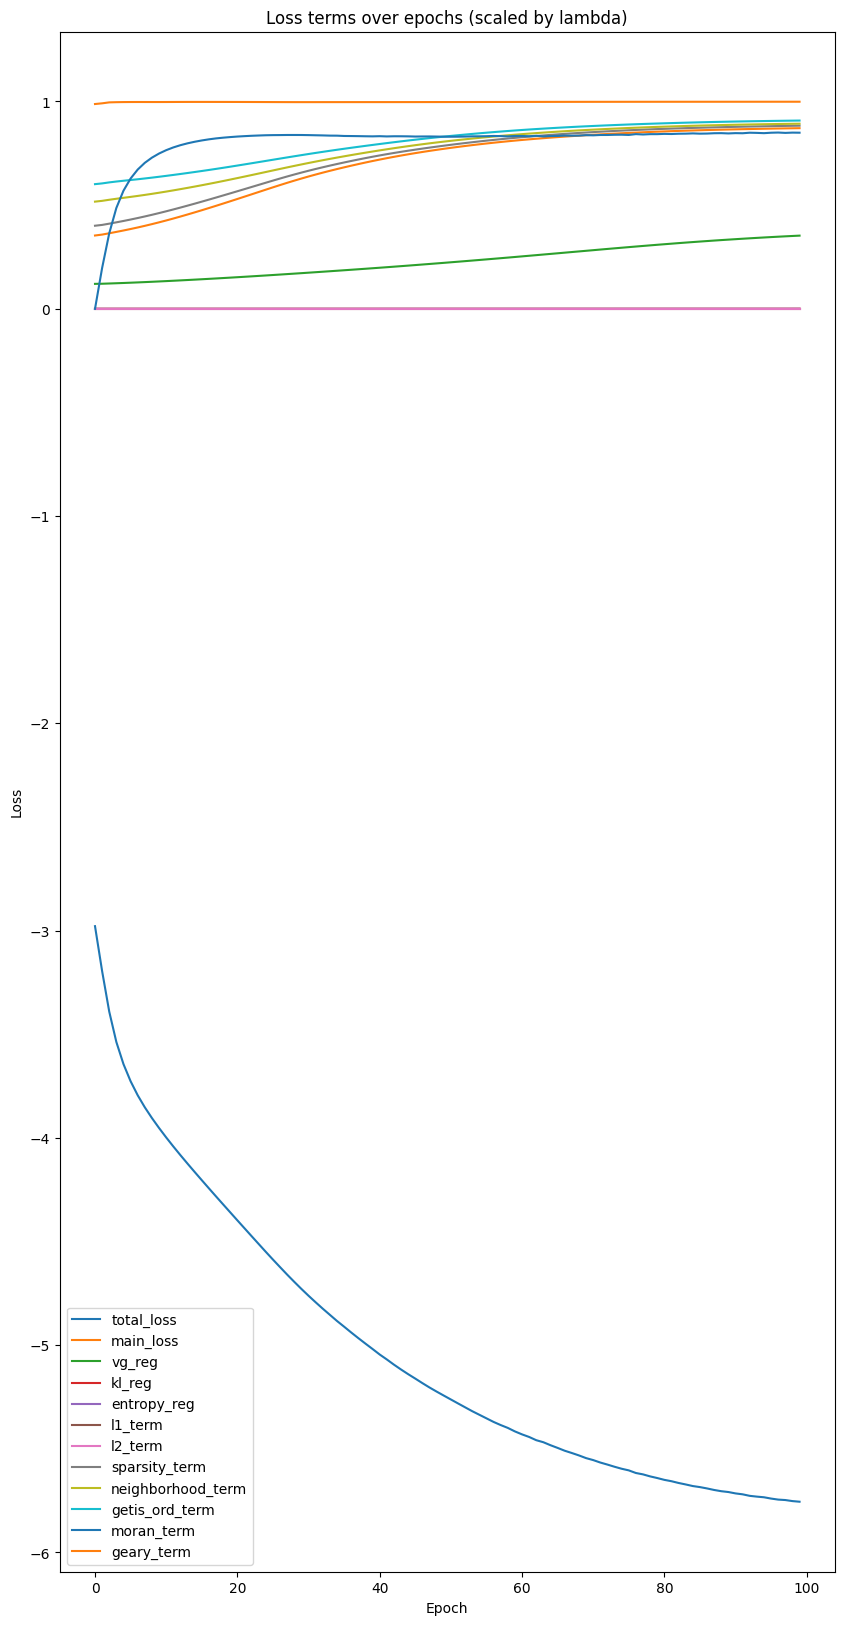

In [11]:
tgl.plot_training_history(adata_map=ad_map, hyperpams=mapper.hparams,
                   log_scale=False, lambda_scale=True)

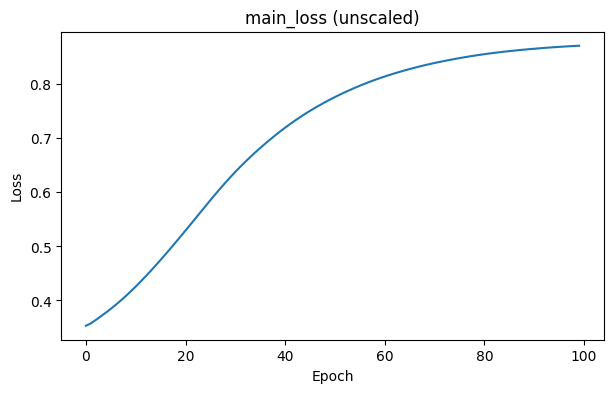

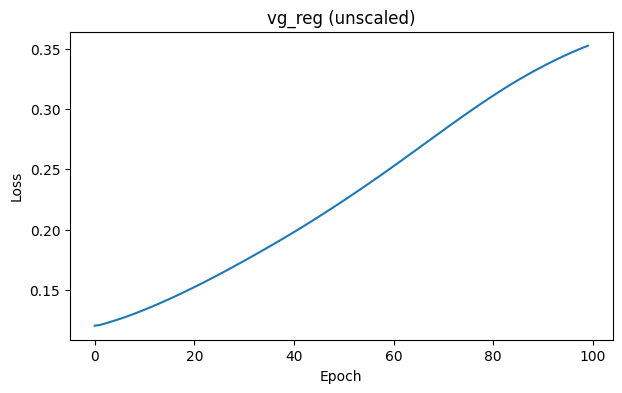

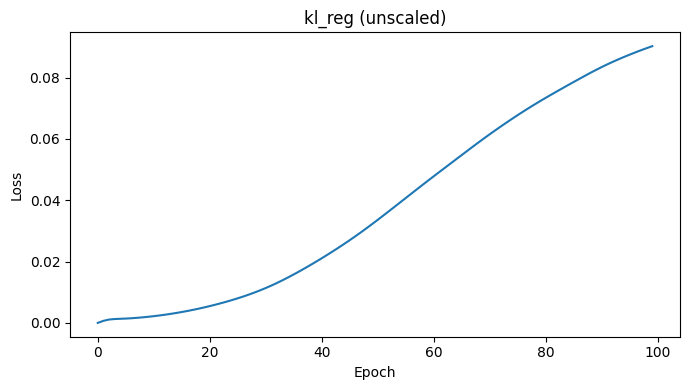

In [12]:
# Plot main loss
tgl.plot_loss_terms(adata_map=ad_map, loss_key=["main_loss", "vg_reg", "kl_reg"], 
                   lambda_coeff = [1, 1, mapper.hparams.lambda_d], lambda_scale=False)

In [13]:
print("Final training score: ", ad_map.uns['training_history']['main_loss'][-1])

Final training score:  0.8711338639259338


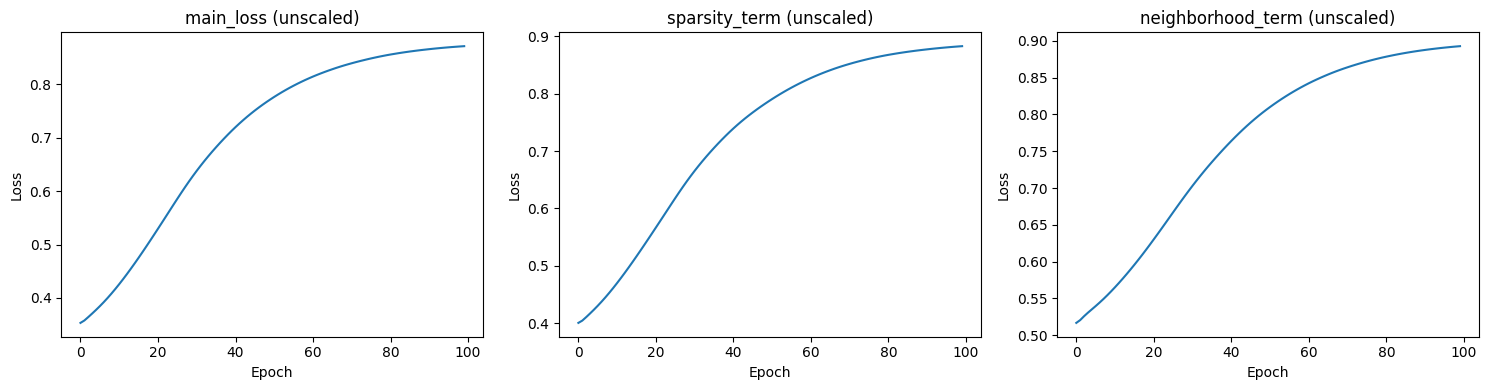

In [14]:
# Score terms
tgl.plot_loss_terms(adata_map=ad_map, loss_key=["main_loss", "sparsity_term", "neighborhood_term"], lambda_scale=False,
                   make_subplot=True, subplot_shape=(1,3))

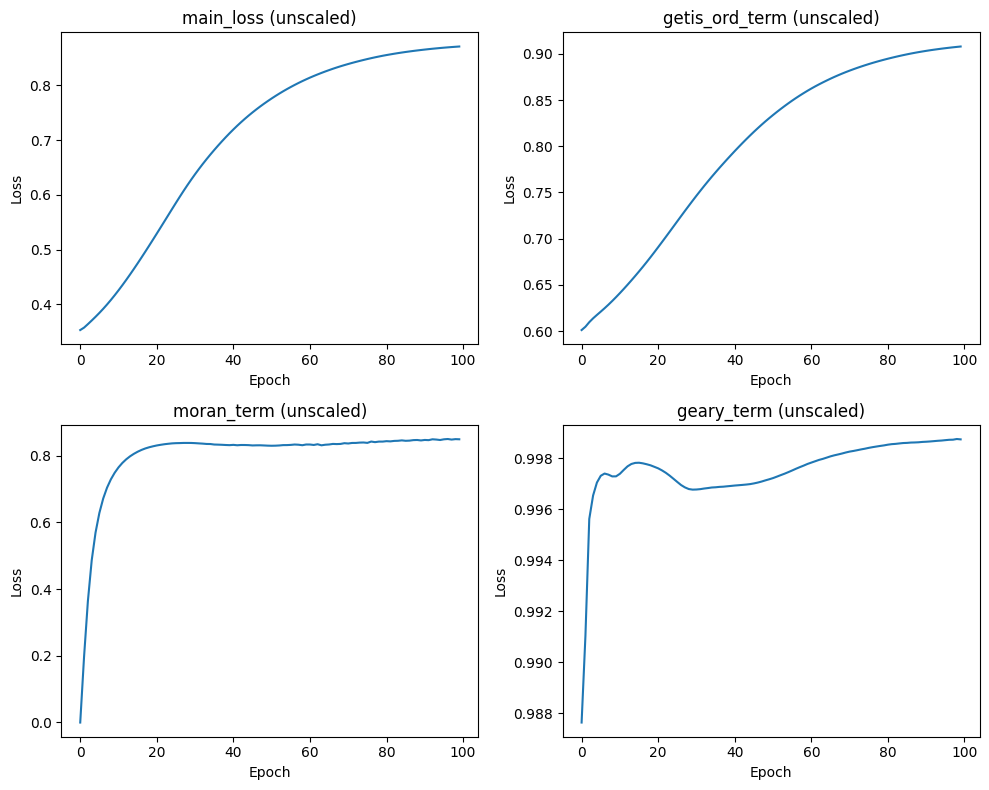

In [15]:
# LISA terms
tgl.plot_loss_terms(adata_map=ad_map, loss_key=["main_loss", "getis_ord_term", "moran_term", "geary_term"], 
                    lambda_scale=False, make_subplot=True)

In [16]:
# CT islands term
tgl.plot_loss_terms(adata_map=ad_map, loss_key="ct_island_term", lambda_scale=False)

ValueError: Loss term 'ct_island_term' has empty history.

# Valdiate model

💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


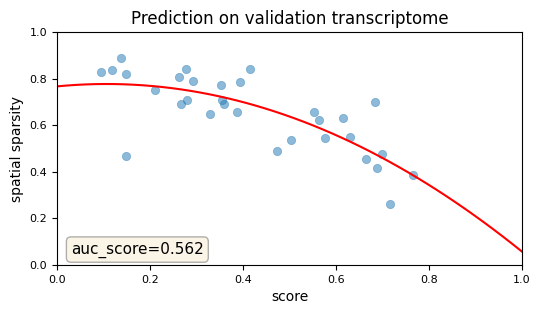

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃       Validate metric       ┃        DataLoader 0         ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           val_AUC           │     0.5620603561401367      │
│           val_JS            │     0.3455868065357208      │
│           val_PCC           │     0.2775976359844208      │
│          val_RMSE           │     1.1876634359359741      │
│          val_SSIM           │     0.2380727380514145      │
│         val_entropy         │     0.27680402994155884     │
│          val_score          │     0.4179322123527527      │
│ val_sparsity-weighted_score │     0.01563902199268341     │
└─────────────────────────────┴─────────────────────────────┘

In [17]:
# call trainer.validate()
full_val = tgl.validate_mapping_experiment(mapper, mapper_data)

# Sparsity

In [18]:
# Project all sc data onto spots
ad_ge = tgl.project_sc_genes_onto_space(ad_map, mapper_data)
ad_ge

AnnData object with n_obs × n_vars = 2000 × 27998
    obs: 'Animal_ID', 'Animal_sex', 'Behavior', 'Bregma', 'Centroid_X', 'Centroid_Y', 'Cell_class', 'Neuron_cluster_ID'
    var: 'gene_ids', 'sparsity', 'is_training'
    uns: 'overlap_genes', 'training_genes'

In [19]:
# Create training genes scores dataframe
df = tgl.compare_spatial_gene_expr(ad_ge, mapper_data)

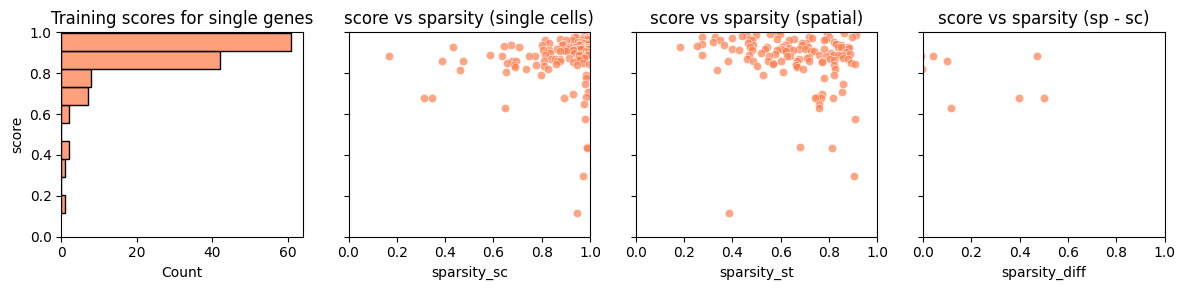

In [20]:
# Plot training scores panels
tgl.plot_training_scores(df)

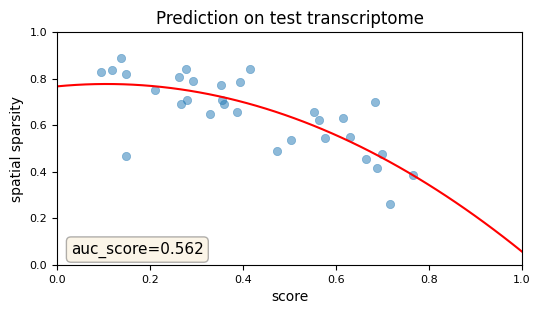

In [21]:
# Plot polyfit on test genes
tgl.plot_auc_curve(df)  # same as validation genes

# Save

In [22]:
# Write tgl.map_cells_to_space() output to .h5ad
sc.write(filename='/nfsd/sysbiobig/bazzaccoen/tangramlit_dev/results/adata_map_Dataset6', adata=ad_map, ext='h5ad')